In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, MinMaxScaler ,normalize
from sklearn import preprocessing
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [30]:
train=pd.read_csv('C://Users//Owner//Desktop//와이빅타//Drugstore_data//train.csv',engine='python')

In [16]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [17]:
train.head(100)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2013-01-01,0,0,0,0,a,1
1,2,2,2013-01-01,0,0,0,0,a,1
2,3,2,2013-01-01,0,0,0,0,a,1
3,4,2,2013-01-01,0,0,0,0,a,1
4,5,2,2013-01-01,0,0,0,0,a,1
5,6,2,2013-01-01,0,0,0,0,a,1
6,7,2,2013-01-01,0,0,0,0,a,1
7,8,2,2013-01-01,0,0,0,0,a,1
8,9,2,2013-01-01,0,0,0,0,a,1
9,10,2,2013-01-01,0,0,0,0,a,1


In [31]:
train2=np.array(train)

In [34]:
sales=pd.concat([train['Store'], train['Sales']], axis=1)

In [36]:
sales.head(100)

,Store,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [48]:
salesperstore=sales.groupby('Store')['Sales'].sum()
salesperstore

Store
1        3485577
2        3617293
3        5034808
4        7030929
5        3394587
6        4051610
7        6414848
8        3999052
9        4714667
10       4046453
11       5900981
12       5536681
13       2852654
14       4002164
15       4864097
16       5538796
17       4625895
18       4753819
19       4676309
20       4354928
21       3953447
22       2544371
23       4005546
24       6787317
25       7819121
26       4848791
27       6868495
28       3828592
29       5305999
30       3898307
          ...   
1086     5679803
1087     4569327
1088     3689072
1089     7356745
1090     4680807
1091     6026532
1092     6787835
1093     6049736
1094     2584739
1095     3486078
1096     3936751
1097     8513395
1098     3819797
1099     6413700
1100     3897312
1101     7268344
1102     3993121
1103     3609616
1104     3107716
1105     3279573
1106     3566947
1107     3544206
1108     4162243
1109     2805753
1110     3299867
1111     3838161
1112     7493274
1113    

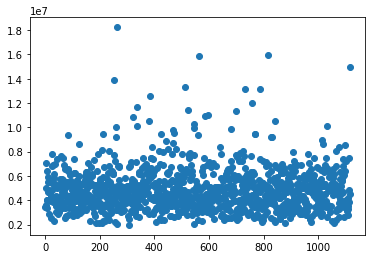

In [70]:
x=[i+1 for i in range(1115)]
plt.scatter(x,salesperstore)

In [94]:
e=[]
storesalesperday=sales.groupby('Store')['Sales'].aggregate(lambda x: list(x))
len(storesalesperday[1])

881

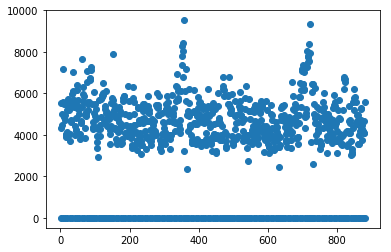

In [98]:
x1=[i+1 for i in range(881)]
plt.scatter(x1,storesalesperday[1])

In [106]:
len(storesalesperday[1][::7])

126

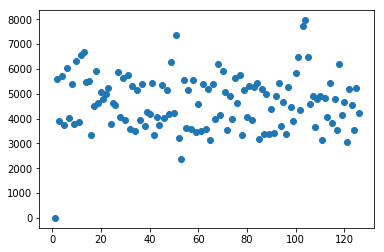

In [108]:
x2=[i+1 for i in range(126) ]
plt.scatter(x2,storesalesperday[1][::7])

In [109]:
storesalesperday[1]

[0,
 5530,
 4327,
 4486,
 4997,
 0,
 7176,
 5580,
 5471,
 4892,
 4881,
 4952,
 0,
 4717,
 3900,
 4008,
 4044,
 4127,
 5182,
 0,
 5394,
 5720,
 5578,
 5195,
 5586,
 5598,
 0,
 4055,
 3725,
 4601,
 4709,
 5633,
 5970,
 0,
 7032,
 6049,
 6140,
 5499,
 5681,
 5370,
 0,
 4409,
 4015,
 4252,
 4241,
 4809,
 6154,
 0,
 6407,
 5386,
 5660,
 5261,
 5000,
 5237,
 0,
 4038,
 3794,
 4558,
 4676,
 4611,
 5350,
 0,
 7675,
 6300,
 5973,
 5637,
 5853,
 5578,
 0,
 4949,
 3853,
 4341,
 5108,
 4925,
 5003,
 0,
 7072,
 6563,
 5598,
 5179,
 5506,
 5603,
 0,
 6729,
 6686,
 6660,
 7285,
 0,
 7132,
 0,
 0,
 5484,
 4625,
 4293,
 4390,
 5075,
 0,
 6046,
 5514,
 4903,
 4366,
 5263,
 4773,
 0,
 3941,
 3357,
 3649,
 2952,
 4303,
 4350,
 0,
 5672,
 4492,
 4309,
 3939,
 4841,
 5726,
 0,
 5821,
 5925,
 0,
 6486,
 6027,
 5912,
 0,
 4568,
 4624,
 5230,
 0,
 5409,
 5064,
 0,
 6106,
 5083,
 4790,
 4448,
 4856,
 4413,
 0,
 0,
 4789,
 3559,
 4030,
 4232,
 4408,
 0,
 5519,
 4995,
 5784,
 0,
 7893,
 5693,
 0,
 5422,
 5220,
 5